<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Backpropagation-Practice" data-toc-modified-id="Backpropagation-Practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Backpropagation Practice</a></span><ul class="toc-item"><li><span><a href="#Data-Science-Unit-4-Sprint-2-Assignment-2" data-toc-modified-id="Data-Science-Unit-4-Sprint-2-Assignment-2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Data Science Unit 4 Sprint 2 Assignment 2</em></a></span></li><li><span><a href="#Try-building/training-a-more-complex-MLP-on-a-bigger-dataset." data-toc-modified-id="Try-building/training-a-more-complex-MLP-on-a-bigger-dataset.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Try building/training a more complex MLP on a bigger dataset.</a></span></li><li><span><a href="#Stretch-Goals:" data-toc-modified-id="Stretch-Goals:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Stretch Goals:</a></span></li></ul></li></ul></div>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

### IMPORTS

In [1]:
import pandas as pd
import numpy as np

### CREATE INPUT & OUTPUT DATASETS

In [2]:
# Create input and output data structures
df_X = pd.DataFrame({
    "x1": [0,0,1,0,1,1,0],
    "x2": [0,1,0,1,0,1,0],
    "x3": [1,1,1,0,0,1,0]
})

df_y = pd.DataFrame({
    "y": [0,1,1,1,1,0,0]
})

In [3]:
X = df_X.to_numpy()
y = df_y.to_numpy()

### DEFINE A NEURAL NETWORK CLASS

In [4]:
class NeuralNetwork:
    
    # Initialize a class instance
    def __init__(self):
        # Define the network architecture
        self.num_inputs = 3
        self.num_hiddenNodes = 4
        self.num_outputNodes = 1
        self.store_activated_output = 0
        
        # Initialize a two sets of weights for the:
        #   a. input to hidden layer path
        #   b. hidden layer to output path
        self.weights_a = np.random.randn(self.num_inputs, self.num_hiddenNodes)
        self.weights_b = np.random.randn(self.num_hiddenNodes, self.num_outputNodes)
        
    # Define a sigmoid activation function
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    # Define derivative sigmoid function
    def sigmoidPrime(self, s):
        sx = self.sigmoid(s)
        return sx * (1-sx)
    
    # Define the Feed Forward Function
    def feed_forward(self, X):
        
        # Calculate the weighted sums for the input to hidden layer path
        self.hidden_sum = np.dot(X, self.weights_a)
        
        # Activate the hidden layer neurons via the sigmoid function
        self.activate_hidden = self.sigmoid(self.hidden_sum)
        
        # Calculate the weighted sum for the hidden to output layer path
        self.output_sum = np.dot(self.activate_hidden, self.weights_b)
        
        # Activate the output neuron and return the output layer as the feed forward result
        self.activated_output = self.sigmoid(self.output_sum)
        
        # Return
        self.store_activated_output = self.activated_output
        return self.activated_output
    
    # Define the Backward propagation function
    def back_propagation(self, X, y, otput):
        
        # Calculate the output layer error
        self.out_error = y - otput
        
        # Apply the derivative of the sigmoid function to the error values
        self.out_delta = self.out_error * self.sigmoidPrime(self.output_sum)
        
        # Calculate the hidden layer error
        self.hidden_error = self.out_delta.dot(self.weights_b.T)
        
        # Apply the derivative of the sigmoid function to the error values
        self.hidden_delta = self.hidden_error * self.sigmoidPrime(self.hidden_sum)
        
        # Adjust the weights accordingly
        
        # Adjust hidden to the output layer weights
        self.weights_b += self.activate_hidden.T.dot(self.out_delta)
        # Adjust input to hidden layer weights
        self.weights_a += X.T.dot(self.hidden_delta)
        
    # Train the the model
    def train(self, X, y):
        o = self.feed_forward(X)
        self.back_propagation(X, y, o) 
        
    # Grab the last feed_forward value
    def get_ff_value(self):
        return self.store_activated_output

### Execute One Epoch

In [5]:
# Declare a modeling 
nn = NeuralNetwork()
nn.train(X, y)

In [6]:
nn.out_error

array([[-0.71353128],
       [ 0.13917364],
       [ 0.23800343],
       [ 0.06814565],
       [ 0.14108585],
       [-0.85841954],
       [-0.85912407]])

### Iterate Through the Model Cycling Through Multiple Epochs

In [8]:
# Redeclare the model object
nn = NeuralNetwork()

# Iterate through 10000 Epochs (Cycles)
for i in range(10000):
    # Print out processing data at certain epochs
    if i % 1000 == 0:
        print(f'***** Iteration #{i} *****')
        print(f'Predicted Output:\n{str(nn.get_ff_value())}')
        print(f'Loss:\n{str(np.mean(np.square(y - nn.get_ff_value())))}')
        
    # Execute an iteration via the train method
    nn.train(X, y)    

***** Iteration #0 *****
Predicted Output:
0
Loss:
0.5714285714285714
***** Iteration #1000 *****
Predicted Output:
[[0.01014967]
 [0.94678694]
 [0.9540055 ]
 [0.95608895]
 [0.95685719]
 [0.04459378]
 [0.09365331]]
Loss:
0.0027998812157787392
***** Iteration #2000 *****
Predicted Output:
[[0.00587448]
 [0.96557425]
 [0.97030267]
 [0.9706094 ]
 [0.97171629]
 [0.02469124]
 [0.06426691]]
Loss:
0.0012150345276118796
***** Iteration #3000 *****
Predicted Output:
[[0.00440319]
 [0.97273051]
 [0.97646314]
 [0.97636927]
 [0.97745445]
 [0.0180679 ]
 [0.05206272]]
Loss:
0.0007743836032964283
***** Iteration #4000 *****
Predicted Output:
[[0.00361864]
 [0.97675672]
 [0.97992481]
 [0.97967542]
 [0.98070801]
 [0.01461613]
 [0.04494301]]
Loss:
0.0005678760618502684
***** Iteration #5000 *****
Predicted Output:
[[0.00311864]
 [0.97941828]
 [0.98221295]
 [0.98188917]
 [0.98287005]
 [0.01245265]
 [0.04013511]]
Loss:
0.0004481492555105945
***** Iteration #6000 *****
Predicted Output:
[[0.00276694]
 [0.9

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [9]:
from tensorflow.keras.datasets import fashion_mnist

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


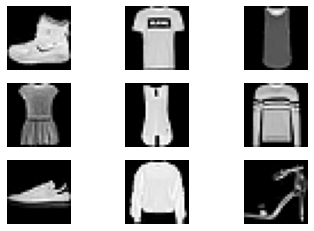

In [10]:
import matplotlib.pyplot as plt

for i in range(9):
    # Define subplot
    plt.subplot(330 + 1 + i)
    
    # Plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

# Show the figure
plt.show()

### Flatten the X Dataset Rows
From 28 x 28 matrices to single arrays

In [68]:
tmp_X_trn_flat = []

# Create a list of flattened X_train rows
for i in range(len(X_train)):
    tmp_X_trn_flat.append(list(X_train[i].flatten()))

In [69]:
type(tmp_X_trn_flat[0])

list

In [70]:
# Create a dataframe of MNIST documents
df_X_trn = pd.DataFrame({"X_rows": tmp_X_trn_flat})

In [73]:
type(df_X_trn.iloc[2])

pandas.core.series.Series

In [74]:
# Creat numpy object of the dataframe
X_trn_flat = df_X_trn.to_numpy()

In [77]:
X_trn_flat.shape

(60000, 1)

In [103]:
type(X_trn_flat[0][0][500])

numpy.uint8

In [104]:
X_trn_flat_mtx = np.empty([60000, 784], dtype=int)

for i in range(60000):
    for j in range(784):
        X_trn_flat_mtx[i][j] = X_trn_flat[i][0][j]
        
    if i % 1000 == 0:
        print(f'On data row: {i}')

On data row: 0
On data row: 1000
On data row: 2000
On data row: 3000
On data row: 4000
On data row: 5000
On data row: 6000
On data row: 7000
On data row: 8000
On data row: 9000
On data row: 10000
On data row: 11000
On data row: 12000
On data row: 13000
On data row: 14000
On data row: 15000
On data row: 16000
On data row: 17000
On data row: 18000
On data row: 19000
On data row: 20000
On data row: 21000
On data row: 22000
On data row: 23000
On data row: 24000
On data row: 25000
On data row: 26000
On data row: 27000
On data row: 28000
On data row: 29000
On data row: 30000
On data row: 31000
On data row: 32000
On data row: 33000
On data row: 34000
On data row: 35000
On data row: 36000
On data row: 37000
On data row: 38000
On data row: 39000
On data row: 40000
On data row: 41000
On data row: 42000
On data row: 43000
On data row: 44000
On data row: 45000
On data row: 46000
On data row: 47000
On data row: 48000
On data row: 49000
On data row: 50000
On data row: 51000
On data row: 52000
On dat

In [113]:
class NeuralNetworkMNIST:
    
    # Initialize a class instance
    def __init__(self, num_in=784, num_hnodes=785, num_onodes=1):
        # Define the network architecture
        self.num_inputs = num_in
        self.num_hiddenNodes = num_hnodes
        self.num_outputNodes = num_onodes
        self.store_activated_output = 0
        
        # Initialize a two sets of weights for the:
        #   a. input to hidden layer path
        #   b. hidden layer to output path
        self.weights_a = np.random.randint(self.num_inputs*self.num_hiddenNodes, size=(self.num_inputs, self.num_hiddenNodes))
        self.weights_b = np.random.randint(self.num_hiddenNodes*self.num_outputNodes, size=(self.num_hiddenNodes, self.num_outputNodes))
        
    # Define a sigmoid activation function
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    # Define derivative sigmoid function
    def sigmoidPrime(self, s):
        sx = self.sigmoid(s)
        return sx * (1-sx)
    
    # Define the Feed Forward Function
    def feed_forward(self, X):
        
        # Calculate the weighted sums for the input to hidden layer path
        self.hidden_sum = np.dot(X, self.weights_a)
        
        # Activate the hidden layer neurons via the sigmoid function
        self.activate_hidden = self.sigmoid(self.hidden_sum)
        
        # Calculate the weighted sum for the hidden to output layer path
        self.output_sum = np.dot(self.activate_hidden, self.weights_b)
        
        # Activate the output neuron and return the output layer as the feed forward result
        self.activated_output = self.sigmoid(self.output_sum)
        
        # Return
        self.store_activated_output = self.activated_output
        return self.activated_output
    
    # Define the Backward propagation function
    def back_propagation(self, X, y, otput):
        
        # Calculate the output layer error
        self.out_error = y - otput
        
        # Apply the derivative of the sigmoid function to the error values
        self.out_delta = self.out_error * self.sigmoidPrime(self.output_sum)
        
        # Calculate the hidden layer error
        self.hidden_error = self.out_delta.dot(self.weights_b.T)
        
        # Apply the derivative of the sigmoid function to the error values
        self.hidden_delta = self.hidden_error * self.sigmoidPrime(self.hidden_sum)
        
        # Adjust the weights accordingly
        
        # Adjust hidden to the output layer weights
        self.weights_b += self.activate_hidden.T.dot(self.out_delta)
        # Adjust input to hidden layer weights
        self.weights_a += X.T.dot(self.hidden_delta)
        
    # Train the the model
    def train(self, X, y):
        o = self.feed_forward(X)
        self.back_propagation(X, y, o) 
        
    # Grab the last feed_forward value
    def get_ff_value(self):
        return self.store_activated_output

In [ ]:
# Declare the model object
nn_mnist = NeuralNetworkMNIST()
nn_mnist.train(X_trn_flat_mtx, y_train)

# Iterate through 2 Epochs (Cycles)
for i in range(2):
    # Print out processing data at certain epochs
    if i % 1000 == 0:
        print(f'***** Iteration #{i} *****')
        print(f'Predicted Output:\n{str(nn_mnist.get_ff_value())}')
        print(f'Loss:\n{str(np.mean(np.square(y - nn_mnist.get_ff_value())))}')
        
    # Execute an iteration via the train method
    nn_mnist.train(X_trn_flat_mtx, y_train)  

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?